#**Final Report**

## Title

## Abstract

## Introduction

The dataset we use is "Skin Cancer MNIST: Ham10000". Skin Cancer MNIST: HAM10000 is a dataset collected dermatoscopic images acquired from different populations. The dataset contains 10015 dermatoscopic image including a representative collection of all important diagnotic categories in the realm of pigmented lesions. We want to know if we can build an application that can distinguish the different skin condition utilizing machine learning.

## Background

## Data

### The Dataset

<br>HAM10000 dataset ("Human Against Machine with 10000 training images") is a collection of dermatoscopic images of pigmented lesions from various source.

<br>The dataset contains 10015 dermatoscopic images including a representative collection of all important diagnotic categories in the realm of pigment lesions.

<br>There are 7 different types of skin conditions:
- Melanocytic nevi (nv)
- Melanoma (mel)
- Benign keratosis-like lesions (bkl)
- Basal cell carcinoma (bcc)
- Actinic keratoses (akiec)
- Vascular lesions (vasc)
- Dermatofibroma (df)

In [21]:
!pwd

/content


In [22]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [23]:
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

100% 2.58G/2.59G [00:21<00:00, 62.0MB/s]
100% 2.59G/2.59G [00:21<00:00, 127MB/s] 


In [ ]:
!unzip /content/ham1000-segmentation-and-classification.zip

In [2]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-gxq1231_
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-gxq1231_
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179891 sha256=35edf2b6d4d25b299f93c1afc7d89bde66aaae3a2e520a80ff6f8ef4febce22c
  Stored in directory: /tmp/pip-ephem-wheel-cache-5elb809x/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

The main csv file, HAM10000_metadata.csv, includes the following information for all the image data.
- Lesion_id
- Image_id
- Dx
- Dx_type
- Age
- Sex
- Localization

In [38]:
df = pd.read_csv('../content/drive/MyDrive/DSE_I2100/data/HAM10000_metadata.csv')

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


We can notice that only age has missing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


### Data Cleaning

We use isnull() to get a list of all the missing data.

In [39]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

We will use fillna() to fill all the missing age with mean age.

In [40]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

We confirm that there is not more missing data.

In [41]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [42]:
print(df['age'].min())
print(df['age'].max())

0.0
85.0


In [43]:
print(df['sex'].unique())

['male' 'female' 'unknown']


In [ ]:
print(df['dx'].unique())

['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']


In [ ]:
print(df['dx_type'].unique())

['histo' 'consensus' 'confocal' 'follow_up']


In [ ]:
print(df['localization'].unique())

['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


There are unknown in sex and localization, we should remove them from the datafram before EDA.

In [44]:
# Remove unknown in sex and localization
df= df[df['localization'] != 'unknown']
df= df[df['sex'] != 'unknown']
df.count()

lesion_id       9771
image_id        9771
dx              9771
dx_type         9771
age             9771
sex             9771
localization    9771
dtype: int64

### EDA (Exploratory Data Analysis)

We will perform EDA to visualize data, detect errors and outliers, discover relationships and patterns.

#### Univariate Analysis

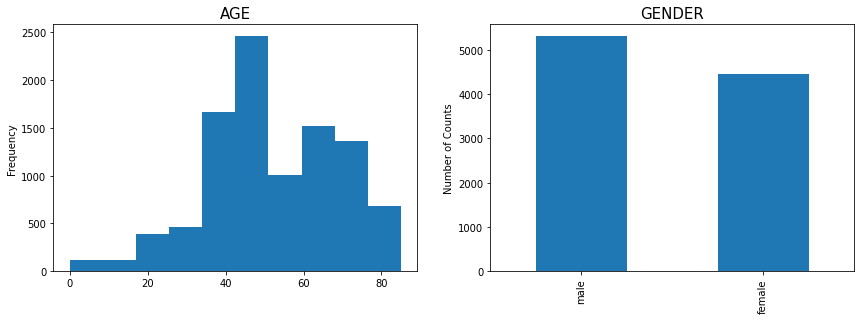

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
df['age'].plot.hist()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Number of Counts")
df['sex'].value_counts().plot.bar()


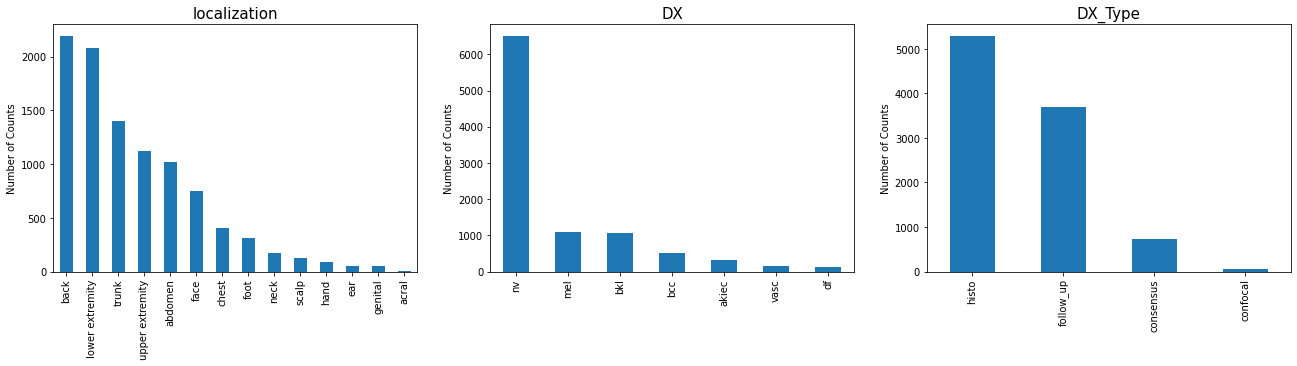

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(2,4,1)
plt.title("localization",fontsize=15)
plt.ylabel("Number of Counts")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("DX",fontsize=15)
plt.ylabel("Number of Counts")
df['dx'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("DX_Type",fontsize=15)
plt.ylabel("Number of Counts")
plt.xticks(rotation=45)
df['dx_type'].value_counts().plot.bar()

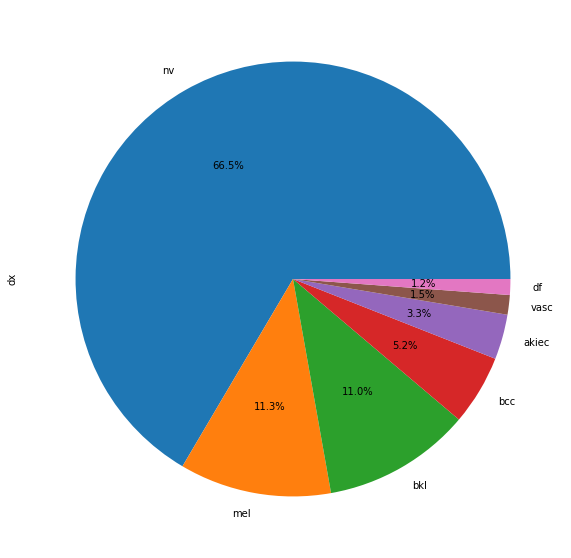

In [ ]:
plt.figure(figsize=(15,10))
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")

#### Bivariate Analysis

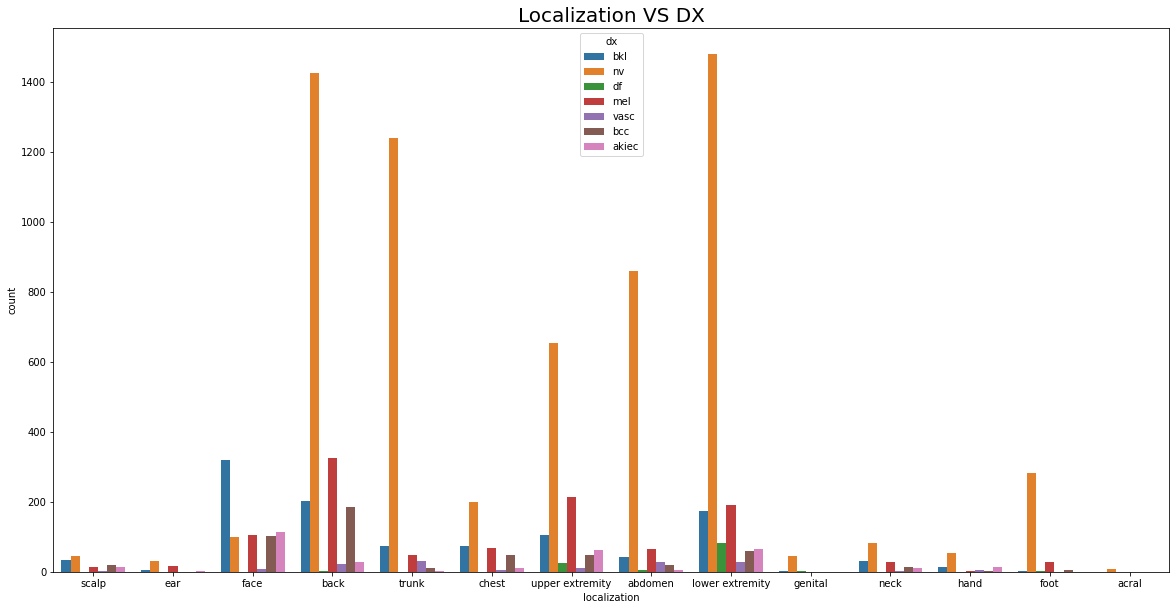

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Localization VS DX',fontsize = 20)
sns.countplot(x='localization', hue='dx',data=df)

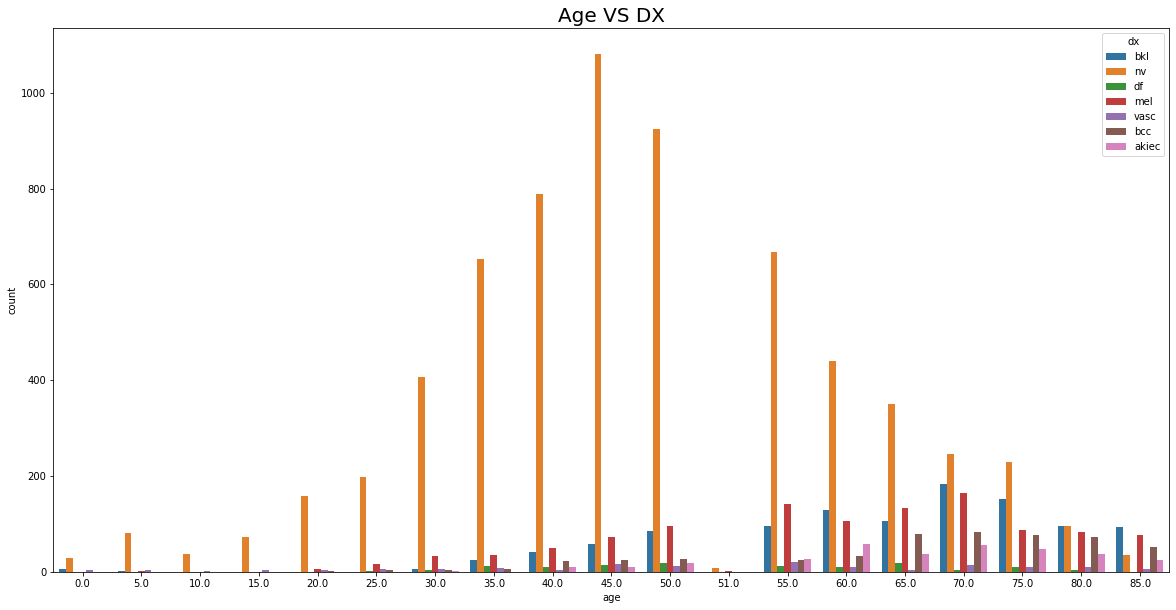

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Age VS DX',fontsize = 20)
sns.countplot(x='age', hue='dx',data=df)

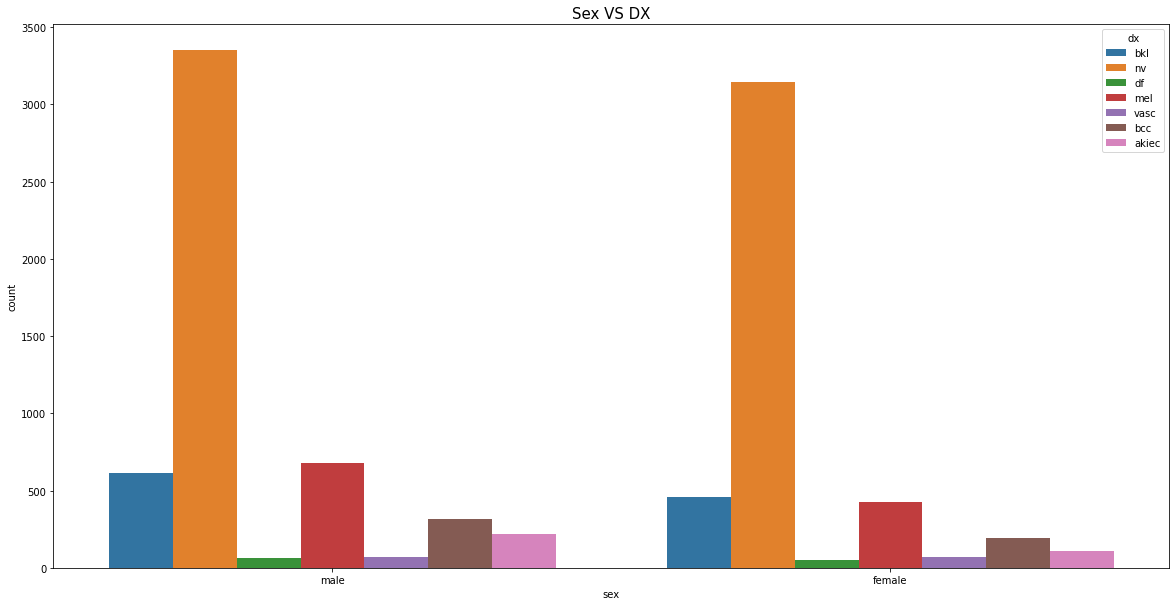

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Sex VS DX',fontsize = 15)
sns.countplot(x='sex', hue='dx',data=df)

## Methods

### Data Preprocessing
<br>In this section we will be building two data preprocessing pipeline. One for the sklearn models such as linear, logistic and SVM. The second data preprocessing pipeline is prepare data for keras models such as DNN and CNN. The image data will be rescale to 0 to 1 as it will help the model fit better. However, for the model built with EfficientnetB1 will not be rescale as the model will rescale image in its layers. 

#### Helper Functions

The data package has csv file that contains the image ID for the corresponding image to each row. Therefore, we built functions to transform image into numpy arrays that are used later in model training.

In [4]:
# Input the path of a csv containing image id and label will return the image path.
def getDF(path):
  df = pd.read_csv(path)
  df['image'] = df['image'] +'.jpg'

  labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
  label_list=[]
  for index, row in df.iterrows():
      temp = list(row)
      del temp[0]
      index=np.argmax(temp)
      label=labels[index]
      label_list.append(label)
  df['label']= label_list
  df=df.drop(labels, axis=1)
  return df

In [5]:
# Input the dataframe, image path, image size and number of images will return numpy arrays of images and labels
def img_np_convert1(df, image, h, w, count):
  sdir=image
  height=h
  width=w
  channels=3
  batch_size=40
  img_shape=(height, width, channels)
  img_size=(height, width)

  gen=ImageDataGenerator(rescale=1./255) 

  df_gen=gen.flow_from_dataframe(df, sdir, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)
  images, labels = next(df_gen)
  for x in range(count // batch_size):
    temp_images, temp_labels = next(df_gen)
    images = np.concatenate((images, temp_images), axis=0)
    labels = np.concatenate((labels, temp_labels), axis=0)
  return images, labels

In [37]:
# Input the dataframe, image path and image size will return keras data generator
def img_np_convert2(df, image, h, w, scale):

  sdir=image
  height=h
  width=w
  channels=3
  batch_size=40
  img_shape=(height, width, channels)
  img_size=(height, width)
  if scale:
    gen=ImageDataGenerator(rescale=1./255)
  else: 
    gen=ImageDataGenerator() 

  df_gen=gen.flow_from_dataframe(df, sdir, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=True, batch_size=batch_size)
  return df_gen

In [7]:
# Input the dataframe and a number, all the label count that is lower than the number will be oversample to that amount 
def oversample(df, count, rs=42):
  lst = [df]
  for class_index, group in df.groupby('label'):
      lst.append(group.sample(count-len(group), replace=True, random_state=rs))
  df_new = pd.concat(lst)
  return df_new

In [8]:
def spliter(df):
  label = df['label']
  tain_size=0.7
  valid_size = 0.1
  test_size = 0.2
  valid_test_split = valid_size / test_size

  df_train, df_test_val, label_train, label_test_val = train_test_split(df, label, test_size=1-tain_size, shuffle=True, random_state=42)
  df_val, df_test, label_val, label_test = train_test_split(df_test_val, label_test_val, test_size=valid_test_split, shuffle=True, random_state=42)
  return df_train, df_test, df_val

In [45]:
def pipeline1(df, image_path, h, w):
  df = df.rename(columns={"image_id": "image", "dx": "label"})
  df['image'] = df['image'] +'.jpg'

  df_train, df_test, df_val = spliter(df)
  
  majority = df_train['label'].value_counts()[0]

  bal_df_train = oversample(df_train, majority)

  X_train, y_train = img_np_convert1(bal_df_train[['image', 'label']], image_path, h, w, majority*7)
  X_test, y_test = img_np_convert1(df_test[['image', 'label']], image_path, h, w, df_test.shape[0])
  X_val, y_val = img_np_convert1(df_val[['image', 'label']], image_path, h, w, df_val.shape[0])

  return X_train, y_train, X_test, y_test, X_val, y_val

In [46]:
def pipeline2(df_path, image_path, h, w, scale=True):
  df = getDF(df_path)

  df_train, df_test, df_val = spliter(df)
  
  majority = df_train['label'].value_counts()[0]

  bal_df_train = oversample(df_train, majority)

  train_gen = img_np_convert2(bal_df_train, image_path, h, w, scale)
  test_gen = img_np_convert2(df_test, image_path, h, w, scale)
  val_gen = img_np_convert2(df_val, image_path, h, w, scale)

  return train_gen, test_gen, val_gen

In [47]:
image_path = r'../content/images'
X_train, y_train, X_test, y_test, X_val, y_val = pipeline1(df, image_path, 44, 44)

Found 31899 validated image filenames belonging to 7 classes.
Found 1466 validated image filenames belonging to 7 classes.
Found 1466 validated image filenames belonging to 7 classes.


In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(31899, 44, 44, 3) (31899, 7)
(1466, 44, 44, 3) (1466, 7)
(1466, 44, 44, 3) (1466, 7)


In [32]:
df_path = '../content/GroundTruth.csv'
image_path = r'../content/images'
train_gen, test_gen, val_gen = pipeline2(df_path, image_path, 240, 240)

Found 32802 validated image filenames belonging to 7 classes.
Found 1503 validated image filenames belonging to 7 classes.
Found 1502 validated image filenames belonging to 7 classes.


## Evaluation

## Conclusion

## Attribution

## Bibliography

## Appendix